<a href="https://www.kaggle.com/code/parisanahmadi/ml-cardata-0-97-acc-linear-regression-by-parisa?scriptVersionId=95129868" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 


In [2]:
warnings.simplefilter(action = "ignore")
plt.style.use("seaborn")

In [3]:
Data = pd.read_csv("../input/mlcardata097-acc-linear-regression/cardata.csv")
df = pd.DataFrame(Data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
Data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
Data.shape

(301, 9)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
Data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#preprocessing

In [10]:
Data["Year"]

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [11]:
np.max(Data["Year"])

2018

In [12]:
Data["Age"] = 2019 - Data["Year"]
Data.drop("Year", axis = 1, inplace = True)

In [13]:
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [14]:
#Type of columns
#Catogorical

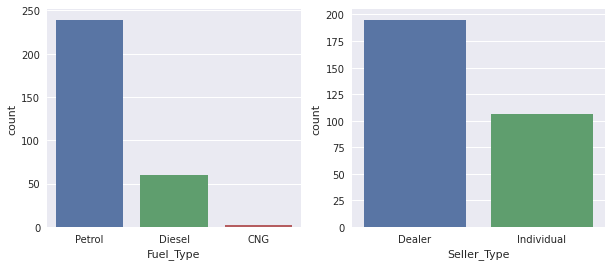

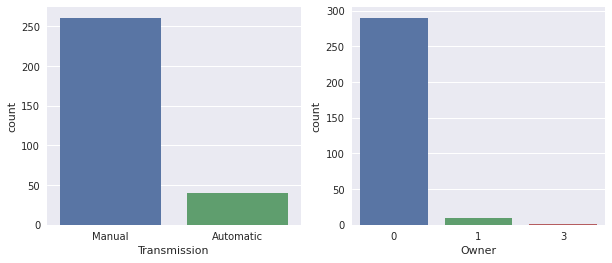

In [15]:
Categorical = ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]
i = 0
while i < 4:
    fig = plt.figure(figsize = [10,4])
    plt.subplot(1,2,1)
    sns.countplot(x = Categorical[i], data = Data)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x = Categorical[i], data = Data)
    i += 1
    plt.show()

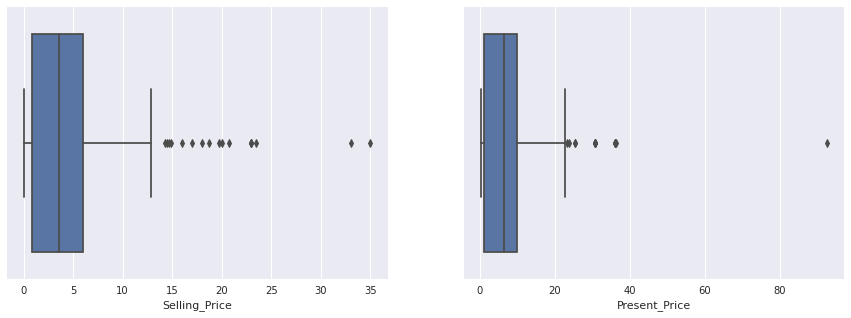

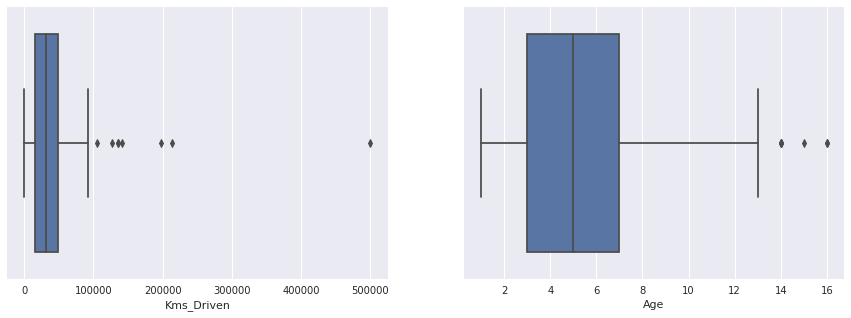

In [16]:
Numberical = ["Selling_Price", "Present_Price", "Kms_Driven", "Age"]
i = 0
while i < 4:
    fig = plt.figure(figsize = [15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x = Numberical[i], data = Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x = Numberical[i], data = Data)
    i += 1
    plt.show()

In [17]:
Data.corr()
#Present_Price

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [18]:
print(pd.unique(Data["Fuel_Type"]))
print(pd.unique(Data["Seller_Type"]))
print(pd.unique(Data["Transmission"]))
print(pd.unique(Data["Owner"]))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [19]:
#replace from 2 to up

In [20]:
Data["Fuel_Type"].replace({"Petrol": 2, "Diesel": 3, "CNG": 4}, inplace = True)
Data["Seller_Type"].replace({"Dealer": 2, "Individual": 3}, inplace = True)
Data["Transmission"].replace({"Manual": 2, "Automatic": 3}, inplace = True)
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [21]:
Data.drop(labels = "Car_Name", axis = 1, inplace = True)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [22]:
 # create a model
 # sepereting target variable and features

In [23]:
X = Data.drop("Selling_Price", axis = 1)
Y = Data["Selling_Price"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1)

In [26]:
print("x_train", X_train.shape)
print("x_test", X_test.shape)
print("y_train", Y_train.shape)
print("y_test", Y_test.shape)


x_train (240, 7)
x_test (61, 7)
y_train (240,)
y_test (61,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [28]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [29]:
Y_pred = Model.predict(X_test)

In [30]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error:  1.153004591615891
Mean Squared Error:  3.2876460857158327
Root Mean Squared Error:  1.8131867211392854
R2 Score:  0.8484549412090382


In [31]:
#improve model
#cross_validation

In [32]:
k_fold = KFold(10)

In [33]:
print(cross_val_score(Model, X,Y.ravel(), cv = k_fold, n_jobs = 1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [34]:
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [35]:
len(Data)/10

30.1

In [36]:
# we drop fold 5-6-7 

In [37]:
Data1 = Data[Data.index < 120]
Data2 = Data[Data.index > 210]
Data3 = Data1.append(Data2)
Data3.reset_index(drop = True, inplace = True)
Data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [38]:
X2 = Data3.drop("Selling_Price", axis = 1)
Y2 = Data3["Selling_Price"]

In [39]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2, test_size = 0.2, random_state = 1)
Model2 = LinearRegression()
Model2.fit(X_train2, Y_train2)

LinearRegression()

In [40]:
Y_pred2 = Model2.predict(X_test2)

In [41]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test2, Y_pred2))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test2, Y_pred2))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test2, Y_pred2)))
print("R2 Score: ", metrics.r2_score(Y_test2, Y_pred2))

Mean Absolute Error:  1.2344068697754242
Mean Squared Error:  2.623898258077042
Root Mean Squared Error:  1.619845133979493
R2 Score:  0.8793462370195001


In [42]:
# +4 increase to 0.88 
# R2_score(2) = 0.88 > R2_score(1) = 0.84

In [43]:
# now coef and intercept

In [44]:
print("model intercept = ",Model2.intercept_)
print("model coef = ",Model2.coef_)

model intercept =  -1.6962350442029548
model coef =  [ 4.42320455e-01 -2.66901271e-05  2.25919515e+00 -1.26225774e+00
  2.10515821e+00 -1.13003710e+00 -4.62552614e-01]


In [45]:
# coef is value of weights according to the number of fearures
# ((((((Present_Price feature))))) has the most weight and this is the most effective feature in the dataframe

In [46]:
Y_pred2 = Model2.predict([[11.23,42000,1,4,6,1,10]])
Y_pred2

array([6.23558857])

In [47]:
#checkout noises^_^

In [48]:
print(pd.unique(Data["Fuel_Type"]))
print(pd.unique(Data["Seller_Type"]))
print(pd.unique(Data["Transmission"]))
print(pd.unique(Data["Owner"]))

[2 3 4]
[2 3]
[2 3]
[0 1 3]


In [49]:
# there isn't any noises here!!!
# but for numberic features......


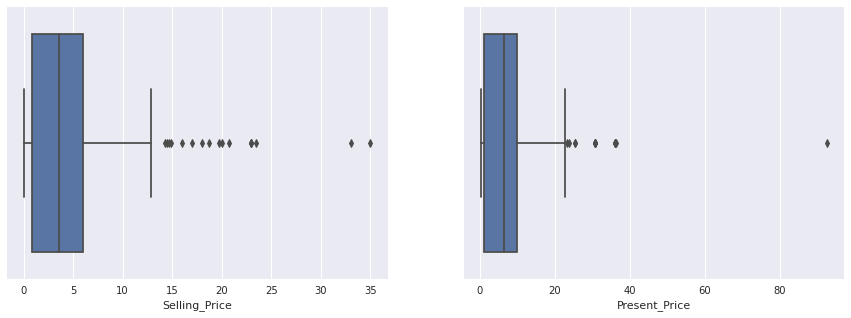

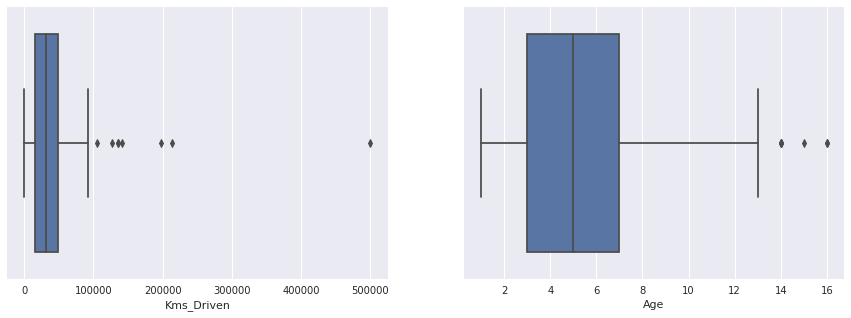

In [50]:
Numberical = ["Selling_Price", "Present_Price", "Kms_Driven", "Age"]
i = 0
while i < 4:
    fig = plt.figure(figsize = [15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x = Numberical[i], data = Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x = Numberical[i], data = Data)
    i += 1
    plt.show()

In [51]:
# selling_prices < 30
# precent_prices < 80
# kms_driven < 400000
# Noises?? no way, all okay

In [52]:
# lets create our model
# simple one


In [53]:
X = pd.DataFrame(Data, columns = ["Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner","Age"])
Y = Data.Selling_Price.values.reshape(-1,1)

In [54]:
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
model= LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2)

Mean Absolute Error:  1.0000326012144771
Mean Squared Error:  2.188556445657229
Root Mean Squared Error:  1.4793770464818052
R2 Score:  0.9134181721224688


In [56]:
# seems good!!! 0.91 % Accuracy
# but can we improve our model?
# lets try
# trying to make nonlinear features

In [57]:
######### DIMENSION X^2


In [58]:
# making function

def check (Dimension,testsize):
    r2 = 0.913418172122469
    for column in X:
        New_Col_Name = column + str(Dimension)
        New_Col_Val = X[column]**Dimension
        X.insert(0, New_Col_Name, New_Col_Val)
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = testsize, random_state = 0)
        New_Model = LinearRegression()
        New_Model.fit(X_train, Y_train)
        Y_pred = New_Model.predict(X_test)
        r2_new = metrics.r2_score(Y_test, Y_pred)
        if r2_new < r2:
            X.drop([New_Col_Name], axis = 1, inplace = True)
        else:
            r2 = r2_new
    print("R2_score: ", r2)
            
            
check(2,0.2)

R2_score:  0.9311515410544492


In [59]:
X

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [60]:
####### 0.93 Acc , well_Done +2% 
####### Higher Dimension didnt change the score

In [61]:
####################

In [62]:
###### Another DOT Product feature
###### DONT USE LOOP FOR this part if yoy have limited features

In [63]:
pres_kms = X["Present_Price"] * X["Kms_Driven"]
pres_kms2 = X["Present_Price"] * X["Kms_Driven2"]
pres_fuel = X["Present_Price"] * X["Fuel_Type"]
pres_fuel2 = X["Present_Price"] * X["Fuel_Type2"]
pres2_kms = X["Present_Price2"] * X["Kms_Driven"]
pres2_kms2 = X["Present_Price2"] * X["Kms_Driven2"]
pres2_fuel = X["Present_Price2"] * X["Fuel_Type"]
pres2_fuel2 = X["Present_Price2"] * X["Fuel_Type2"]

In [64]:
X.insert(0, "pres_kms", pres_kms)
X.insert(0, "pres_kms2", pres_kms2)
X.insert(0, "pres_fuel", pres_fuel)
X.insert(0, "pres_fuel2", pres_fuel2)
X.insert(0, "pres2_kms", pres2_kms)
X.insert(0, "pres2_kms2", pres2_kms2)
X.insert(0, "pres2_fuel", pres2_fuel)
X.insert(0, "pres2_fuel2", pres2_fuel2) 
X

,pres2_fuel2,pres2_fuel,pres2_kms2,pres2_kms,pres_fuel2,pres_fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
model= LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2)

Mean Absolute Error:  0.7263863909732038
Mean Squared Error:  1.192728159573169
Root Mean Squared Error:  1.0921209454878011
R2 Score:  0.9528142925343482


In [66]:
######### OOOooooppppsss!!!!!! 0.95 % Niceeee ?!!!

In [67]:
######## Now let's try KFold

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5) # 5 edge and 6 Fold
results = (cross_val_score(model, X,Y.ravel(), cv = k_fold, n_jobs = -1))
print(results)
print(np.mean(results))
           

[  0.92455675   0.47756749 -23.72880496   0.58594804   0.88655986]
-4.1708345620530105


In [69]:
# -0.23!!!!! bad fold we try to drop it

In [70]:
X.shape

(301, 19)

In [71]:
301/6

50.166666666666664

In [72]:
# the third one is -0.23

In [73]:
df = X[X.index < 100]
df2 =X[X.index > 151]
X_new = df.append(df2)
X_new.reset_index(drop = True, inplace = True)
X_new

,pres2_fuel2,pres2_fuel,pres2_kms2,pres2_kms,pres_fuel2,pres_fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [74]:
Y = Data["Selling_Price"]
Y1 = Y[Y.index < 100]
Y2 = Y[Y.index > 151]
Y_new = Y1.append(Y2)
Y_new.reset_index(drop = True, inplace = True)
Y_new.shape

(249,)

In [75]:
Y_new

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
244     9.50
245     4.00
246     3.35
247    11.50
248     5.30
Name: Selling_Price, Length: 249, dtype: float64

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new, test_size = 0.2, random_state = 0)
model= LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2)

Mean Absolute Error:  0.6748028594139128
Mean Squared Error:  0.840382730376355
Root Mean Squared Error:  0.9167239117511635
R2 Score:  0.9771360806310533


Woooowwwww Almost 0.98%


In [77]:
#### Now let's try normalization


In [78]:
from sklearn import preprocessing
print(X_new[0:5])
X_new.insert(0, "Target", Y_new)
DataFrame = X_new
DataFrame
Scaler = preprocessing.StandardScaler().fit(DataFrame)
Norm = Scaler.transform(DataFrame.astype(float))
print(Norm[0:5])

   pres2_fuel2  pres2_fuel    pres2_kms2    pres2_kms  pres_fuel2  pres_fuel  \
0     124.9924     62.4962  2.277986e+10   843698.700       22.36      11.18   
1     819.1044    273.0348  1.682804e+11  3913498.800       85.86      28.62   
2     388.0900    194.0450  4.619241e+09   669455.250       39.40      19.70   
3      68.8900     34.4450  4.656964e+08    89557.000       16.60       8.30   
4     424.7721    141.5907  8.504893e+10  2003508.405       61.83      20.61   

      pres_kms2  pres_kms  Owner2  Fuel_Type2  Kms_Driven2  Present_Price2  \
0  4.075110e+09  150930.0       0           4    729000000         31.2481   
1  1.763946e+10  410220.0       0           9   1849000000         91.0116   
2  4.689585e+08   67965.0       0           4     47610000         97.0225   
3  1.122160e+08   21580.0       0           4     27040000         17.2225   
4  1.237976e+10  291631.5       0           9   1802002500         47.1969   

   Present_Price  Kms_Driven  Fuel_Type  Seller_Ty

In [79]:
X_norm = DataFrame.drop(["Target"], axis = 1)
Y_norm = DataFrame["Target"].values.reshape(-1,1)

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm,Y_norm, test_size = 0.2, random_state = 0)
model= LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2)

Mean Absolute Error:  0.6748028594139128
Mean Squared Error:  0.840382730376355
Root Mean Squared Error:  0.9167239117511635
R2 Score:  0.9771360806310533


In [81]:
###### Same yeap!!!!

In [82]:
X_new.drop(["Target"], axis = 1, inplace = True)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new, test_size = 0.2, random_state = 0)
model= LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
r2 = metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score: ", r2)

Mean Absolute Error:  0.6748028594139128
Mean Squared Error:  0.840382730376355
Root Mean Squared Error:  0.9167239117511635
R2 Score:  0.9771360806310533


In [84]:
X_test.insert(0, "Y_test", Y_test)
X_test.insert(0,"Y_pred", Y_pred)
X_test

,Y_pred,Y_test,pres2_fuel2,pres2_fuel,pres2_kms2,pres2_kms,pres_fuel2,pres_fuel,pres_kms2,pres_kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.048416,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,...,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.905979,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,...,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.338839,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,...,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.209426,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,...,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.527144,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,...,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.813582,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,...,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.412362,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,...,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.395981,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,...,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.807696,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,...,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.978567,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,...,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [85]:
New_df = X_test.sort_values(by = "Present_Price")
a = New_df.Present_Price
b = New_df.Y_test
c = New_df.Present_Price
d = New_df.Y_pred


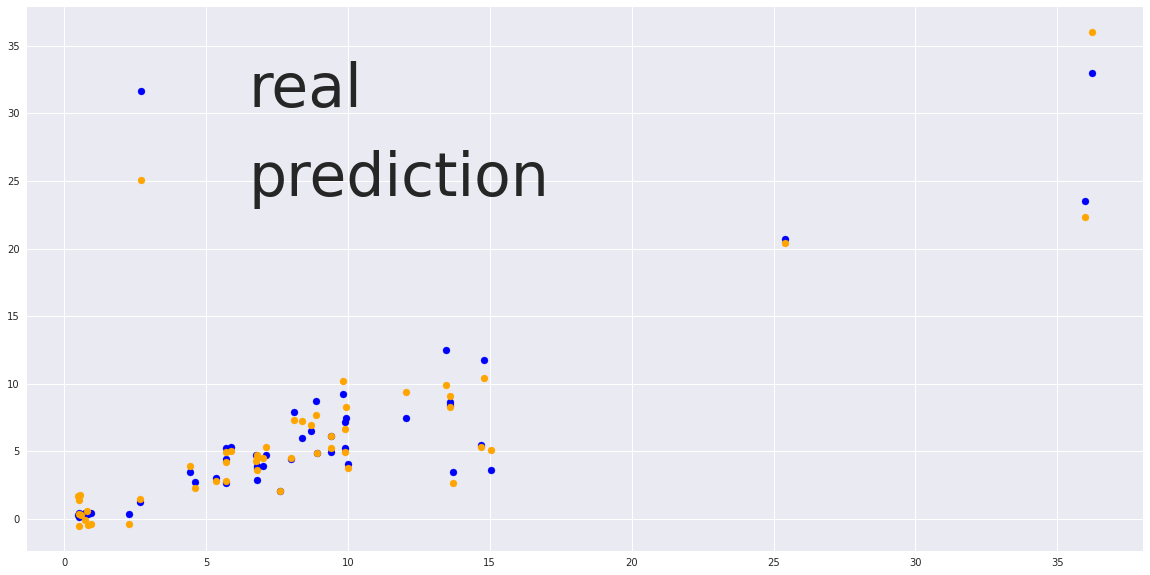

In [86]:
plt.figure(figsize = (20,10))
plt.scatter(a,b, color = "blue", label ="real")
plt.scatter(c,d, color = "orange", label ="prediction") 
plt.legend(fontsize = 60)
plt.show()

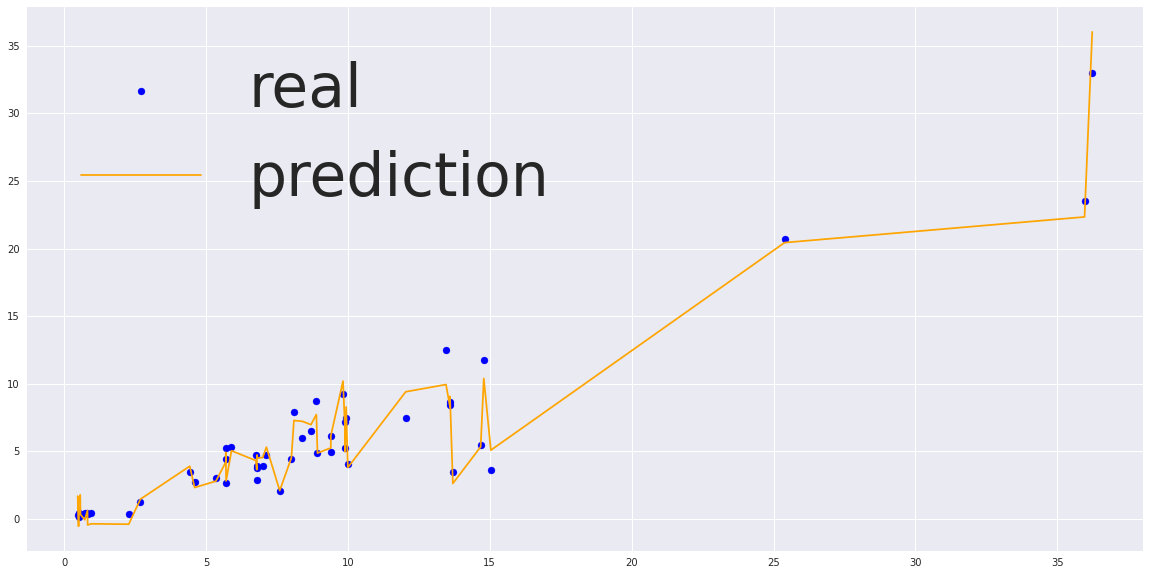

In [87]:
plt.figure(figsize = (20,10))
plt.scatter(a,b, color = "blue", label ="real")
plt.plot(c,d, color = "orange", label ="prediction")
plt.legend(fontsize = 60)
plt.show()

In [88]:
##### predict of given data
##### inputs:

cost of this car??? 

present_price = 11.23

kms_driven = 42000

fuel_type = petrol

Transmission = manual

seller_type = Dealer

owner = 1

age = 10

Price = ?????



In [89]:
DataFrame.insert(0, "Target", Y_new)
DataFrame.columns

Index(['Target', 'pres2_fuel2', 'pres2_fuel', 'pres2_kms2', 'pres2_kms',
       'pres_fuel2', 'pres_fuel', 'pres_kms2', 'pres_kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Age'],
      dtype='object')

In [90]:
### new data

In [91]:
Present_Price = 11.23
Kms_Driven = 42000
Fuel_Type = 2 #petrol
Seller_Type = 2 #Dealer
Transmission = 2 #manual
Owner = 1
Age = 10

Model_input = pd.DataFrame({"Target" : 10, 
                           "pres2_fuel2": [((Present_Price**2)*(Fuel_Type**2))],
                           "pres2_fuel": [((Present_Price**2)*(Fuel_Type))],
                           "pres2_kms2": [((Present_Price**2)*(Kms_Driven**2))],
                           "pres2_kms": [((Present_Price**2)*(Kms_Driven))],
                           "pres_fuel2": [((Present_Price)*(Fuel_Type**2))],
                           "pres_fuel": [((Present_Price)*(Fuel_Type))],
                           "pres_kms2": [((Present_Price)*(Kms_Driven**2))],
                           "pres_kms": [((Present_Price)*(Kms_Driven))],
                           "Owner2": [Owner**2],
                           "Fuel_Type2":[Fuel_Type**2],
                           "Kms_Driven2":[(Kms_Driven**2)],
                           "Present_Price2":[Present_Price**2],
                           "Present_Price":[Present_Price],
                           "Kms_Driven":[Kms_Driven],
                           "Fuel_Type":[Fuel_Type],
                           "Seller_Type":[Seller_Type],
                           "Transmission":[Transmission],
                           "Owner":[Owner],
                           "Age":[Age]})

In [92]:
Model_input

,Target,pres2_fuel2,pres2_fuel,pres2_kms2,pres2_kms,pres_fuel2,pres_fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,10,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [93]:
Finall = DataFrame.append(Model_input)
Finall

,Target,pres2_fuel2,pres2_fuel,pres2_kms2,pres2_kms,pres_fuel2,pres_fuel,pres_kms2,pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,4,29855296,34.8100,5.90,5464,2,2,2,0,3


In [94]:
X = Finall.drop(["Target"], axis=1)[:249]
Y = Finall[["Target"]][:249]
X_Finall = Finall.drop(["Target"], axis =1)[249:]  #X_test
Model.fit(X,Y)


LinearRegression()

In [95]:
Y_pred = Model.predict(X_Finall)
Y_pred

array([[5.26087684]])

Price is 5.26


Range 4-----6  is Accepted

50% of your Score = Price

50% of your Score = Model
